Summary:

- Implemented proposed calibration API by performing a code refactor on generate_with_calibration.py. 
- Performed experiments on calibration curve blowup for different values of top k
- Examined what calibration does qualitatively

TODO:

- Find alpha based using minimization of the cross-entropy loss
- Implement script with multi-GPU
- Implement beam search for two-step lookahead

In [2]:
%matplotlib inline

import os
import sys
sys.path.append('../examples')

import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

In [7]:
import run_generation_2 as gen

# Experiment 1: Entropy blowup curves top k values

- Top k values: 128, 256, 512, 1024
- 1000 independent samples, all 
- length 100, all

In [ ]:
%%capture
ents128 = gen.run("To be or not to be, that is the question:", num_samples=1000, alpha=-0.01, top_k=128) 

11/03/2019 09:00:02 - INFO - transformers.tokenization_utils -   loading file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-vocab.json from cache at /u/myhu/.cache/torch/transformers/f2808208f9bec2320371a9f5f891c184ae0b674ef866b79c58177067d15732dd.1512018be4ba4e8726e41b9145129dc30651ea4fec86aa61f4b9f40bf94eac71
11/03/2019 09:00:02 - INFO - transformers.tokenization_utils -   loading file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-merges.txt from cache at /u/myhu/.cache/torch/transformers/d629f792e430b3c76a1291bb2766b0a047e36fae0588f9dbc1ae51decdff691b.70bec105b4158ed9a1747fea67a43f5dee97855c64d62b6ec3742f4cfdb5feda
11/03/2019 09:00:03 - INFO - transformers.configuration_utils -   loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json from cache at /u/myhu/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.085d5f6a8e7812ea05ff0e6ed0645ab2e75d80387ad55c1ad9806ee70d272f80
11/03/2019 0

Text(0.5, 1.0, 'Entropy blowup, top 128 filtering')

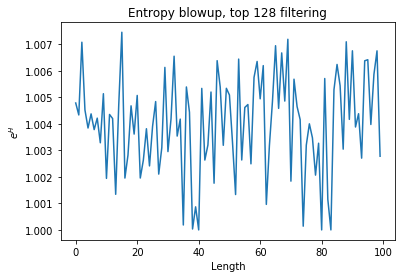

In [17]:
avg_ents = ents128.cpu().numpy()[0]

figure, axis = plt.subplots()
axis.plot(np.exp(avg_ents))
axis.set_xlabel('Length')
axis.set_ylabel('$e^H$')
axis.set_title('Entropy blowup, top 128 filtering')

In [14]:
ents128

tensor([[4.7712e-03, 4.3229e-03, 7.0470e-03, 4.5118e-03, 3.8328e-03, 4.3634e-03,
         3.7731e-03, 4.2029e-03, 3.2784e-03, 5.1195e-03, 1.9415e-03, 4.3412e-03,
         4.1892e-03, 1.3421e-03, 4.7167e-03, 7.4200e-03, 1.9534e-03, 2.8162e-03,
         4.6649e-03, 3.6052e-03, 5.0546e-03, 1.9546e-03, 2.6279e-03, 3.8064e-03,
         2.4096e-03, 3.8995e-03, 4.8248e-03, 2.1020e-03, 3.0963e-03, 6.1050e-03,
         2.9479e-03, 4.1760e-03, 6.5236e-03, 3.5307e-03, 4.1671e-03, 1.8749e-04,
         5.3724e-03, 4.4255e-03, 3.6757e-05, 8.7142e-04, 2.0299e-06, 5.3189e-03,
         2.6299e-03, 3.1963e-03, 5.1825e-03, 1.7594e-03, 6.3569e-03, 5.3710e-03,
         3.1842e-03, 5.3221e-03, 5.0703e-03, 3.2895e-03, 1.3338e-03, 6.4156e-03,
         2.6327e-03, 4.6037e-03, 4.7132e-03, 2.4876e-03, 5.7325e-03, 6.3273e-03,
         4.9280e-03, 6.1712e-03, 9.6276e-04, 3.1709e-03, 4.8425e-03, 6.9164e-03,
         4.5696e-03, 6.6470e-03, 4.8432e-03, 7.1573e-03, 1.8371e-03, 5.6632e-03,
         4.6387e-03, 4.1498e

In [16]:
np.savez('110419_top128.npz', avg_ents)